In [1]:
#Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import seaborn as sns

from sqlalchemy import create_engine

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import sqlite3
from sqlite3 import Error

import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler, PowerTransformer
from scipy.stats import linregress
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy.stats import linregress
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz import trees
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression



In [2]:
#Load the data

os.chdir("C:\\Users\\mohamed.ziane\\OneDrive - Slalom\\Documents\\GitHub\\Climate-Change-in-Kenya\\data\\Processed")

df = pd.read_csv('df_preprocessing_training_LG.csv', index_col=False)

dfy = pd.read_csv('df_preprocessing_training.csv', index_col=False)

In [3]:
df.head(); df.describe().T; df.info()


,timestamp,CO2 (kt)_2_LG,Methane (kt)_LG,Nitrous Oxide(kt)_LG,Total Population_LG,Temperature (DegF)_LG,Precipitation (in)_LG
0,1985-09-01,-1.967903,-1.558215,-1.706544,-1.71924,-1.079776,-0.700926
1,1985-09-02,-1.966895,-1.558495,-1.707220,-1.71924,-0.597831,-0.700926
2,1985-09-03,-1.968262,-1.558320,-1.707351,-1.71924,-0.589035,-0.700926
3,1985-09-04,-1.967171,-1.558993,-1.706083,-1.71924,-0.795440,-0.700926
4,1985-09-05,-1.966236,-1.558738,-1.707069,-1.71924,-0.182630,-0.700926


,count,mean,std,min,25%,50%,75%,max
CO2 (kt)_2_LG,12540.0,9.685324e-16,1.00004,-1.971388,-0.811040,-0.280555,0.933428,1.624908
Methane (kt)_LG,12540.0,5.668512e-16,1.00004,-1.559803,-0.761980,-0.470710,1.151709,1.441783
Nitrous Oxide(kt)_LG,12540.0,-5.076570e-17,1.00004,-1.709545,-0.701966,-0.473463,1.157810,1.414512
Total Population_LG,12540.0,1.306982e-15,1.00004,-1.719240,-0.837135,-0.058697,0.875879,1.701624
Temperature (DegF)_LG,12540.0,-2.089968e-16,1.00004,-3.711125,-0.703304,0.006415,0.687385,3.347446
Precipitation (in)_LG,12540.0,-2.014161e-16,1.00004,-0.700926,-0.700926,-0.700926,0.754321,2.070658


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              12540 non-null  object 
 1   CO2 (kt)_2_LG          12540 non-null  float64
 2   Methane (kt)_LG        12540 non-null  float64
 3   Nitrous Oxide(kt)_LG   12540 non-null  float64
 4   Total Population_LG    12540 non-null  float64
 5   Temperature (DegF)_LG  12540 non-null  float64
 6   Precipitation (in)_LG  12540 non-null  float64
dtypes: float64(6), object(1)
memory usage: 685.9+ KB


In [4]:
dfy.head(); dfy.describe().T; dfy.info()

,Unnamed: 0,Unnamed: 0.1,timestamp,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,...,CT_Relative_Humidity_m,CT_Wind_Speed_10m,CT_Cloud_Cover_Total,CT_Sunshine_Duration,CT_Shortwave_Radiation,CT_Mean_Sea_Level_Pressure,CT_Soil_Temperature_10cm,CT_Soil_Moisture_10cm,CT_Wind_Direction_Dominant_10m,Year_extract_y
0,0,0,1985-09-01,1985,3115.498132,24.162338,16.476346,28.932601,4279.666073,1.365497,...,99,4.457064,15.708333,675.834840,5135.3003,1017.0,75.560020,0.145,292.47943,1985
1,1,1,1985-09-02,1985,3118.855606,21.529548,18.765827,31.529024,4274.313711,0.703036,...,96,7.161691,93.000000,95.744675,4807.7803,1015.1,67.046005,0.141,288.88968,1985
2,2,2,1985-09-03,1985,3119.868040,26.957457,12.745660,31.855229,4280.127290,-3.874296,...,92,8.108701,65.666664,105.773056,2403.0000,1020.8,62.636032,0.137,305.56384,1985
3,3,3,1985-09-04,1985,3122.340297,22.117795,15.393883,30.340974,4279.056049,0.019061,...,90,6.187060,52.820830,379.962770,5029.3896,1021.2,67.369990,0.140,245.22487,1985
4,4,4,1985-09-05,1985,3119.501944,20.538729,13.529428,30.462148,4279.879428,-1.444538,...,100,7.644957,49.208332,423.075840,5007.1406,1023.0,69.944030,0.140,262.43716,1985


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12540.0,6269.500000,3620.130523,0.000000,3134.750000,6269.500000,9404.250000,12539.000000
Unnamed: 0.1,12540.0,6269.500000,3620.130523,0.000000,3134.750000,6269.500000,9404.250000,12539.000000
Year_extract,12540.0,2002.329426,9.912827,1985.000000,1994.000000,2002.000000,2011.000000,2019.000000
CO2 emissions from liquid fuel consumption (kt)_new,12540.0,8002.443374,2976.637887,3110.812371,5539.289289,8072.849328,9801.426182,13271.603790
Energy related methane emissions (% of total)_new,12540.0,26.409585,3.657094,15.440817,23.663625,26.308925,29.138590,38.775679
...,...,...,...,...,...,...,...,...
CT_Mean_Sea_Level_Pressure,12540.0,1019.431284,5.167380,1004.900000,1015.700000,1018.700000,1022.800000,1039.300000
CT_Soil_Temperature_10cm,12540.0,72.958084,11.077126,47.353996,63.495509,72.914020,82.170490,101.282036
CT_Soil_Moisture_10cm,12540.0,0.172284,0.074180,0.061000,0.106000,0.163000,0.228000,0.390000
CT_Wind_Direction_Dominant_10m,12540.0,200.026551,87.813078,0.000000,133.072968,182.560735,282.483470,360.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12540 entries, 0 to 12539
Data columns (total 66 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Unnamed: 0                                                                             12540 non-null  int64  
 1   Unnamed: 0.1                                                                           12540 non-null  int64  
 2   timestamp                                                                              12540 non-null  object 
 3   Year_extract                                                                           12540 non-null  int64  
 4   CO2 emissions from liquid fuel consumption (kt)_new                                    12540 non-null  float64
 5   Energy related methane emissions (% of total)_new                         

In [5]:
df.set_index('timestamp', inplace=True); df.head()

,CO2 (kt)_2_LG,Methane (kt)_LG,Nitrous Oxide(kt)_LG,Total Population_LG,Temperature (DegF)_LG,Precipitation (in)_LG
timestamp,,,,,,
1985-09-01,-1.967903,-1.558215,-1.706544,-1.71924,-1.079776,-0.700926
1985-09-02,-1.966895,-1.558495,-1.707220,-1.71924,-0.597831,-0.700926
1985-09-03,-1.968262,-1.558320,-1.707351,-1.71924,-0.589035,-0.700926
1985-09-04,-1.967171,-1.558993,-1.706083,-1.71924,-0.795440,-0.700926
1985-09-05,-1.966236,-1.558738,-1.707069,-1.71924,-0.182630,-0.700926


In [6]:
dfy.set_index('timestamp', inplace=True); dfy.head()

,Unnamed: 0,Unnamed: 0.1,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new,...,CT_Relative_Humidity_m,CT_Wind_Speed_10m,CT_Cloud_Cover_Total,CT_Sunshine_Duration,CT_Shortwave_Radiation,CT_Mean_Sea_Level_Pressure,CT_Soil_Temperature_10cm,CT_Soil_Moisture_10cm,CT_Wind_Direction_Dominant_10m,Year_extract_y
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-09-01,0,0,1985,3115.498132,24.162338,16.476346,28.932601,4279.666073,1.365497,362.545871,...,99,4.457064,15.708333,675.834840,5135.3003,1017.0,75.560020,0.145,292.47943,1985
1985-09-02,1,1,1985,3118.855606,21.529548,18.765827,31.529024,4274.313711,0.703036,362.384262,...,96,7.161691,93.000000,95.744675,4807.7803,1015.1,67.046005,0.141,288.88968,1985
1985-09-03,2,2,1985,3119.868040,26.957457,12.745660,31.855229,4280.127290,-3.874296,361.687885,...,92,8.108701,65.666664,105.773056,2403.0000,1020.8,62.636032,0.137,305.56384,1985
1985-09-04,3,3,1985,3122.340297,22.117795,15.393883,30.340974,4279.056049,0.019061,364.689648,...,90,6.187060,52.820830,379.962770,5029.3896,1021.2,67.369990,0.140,245.22487,1985
1985-09-05,4,4,1985,3119.501944,20.538729,13.529428,30.462148,4279.879428,-1.444538,361.369231,...,100,7.644957,49.208332,423.075840,5007.1406,1023.0,69.944030,0.140,262.43716,1985


In [7]:
dfy_rm = dfy.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [8]:
dfy_rm.head()

,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Ores and metals exports (% of merchandise exports)_new,Total natural resources rents (% of GDP)_new,...,CT_Relative_Humidity_m,CT_Wind_Speed_10m,CT_Cloud_Cover_Total,CT_Sunshine_Duration,CT_Shortwave_Radiation,CT_Mean_Sea_Level_Pressure,CT_Soil_Temperature_10cm,CT_Soil_Moisture_10cm,CT_Wind_Direction_Dominant_10m,Year_extract_y
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-09-01,1985,3115.498132,24.162338,16.476346,28.932601,4279.666073,1.365497,362.545871,1.829561,4.292895,...,99,4.457064,15.708333,675.834840,5135.3003,1017.0,75.560020,0.145,292.47943,1985
1985-09-02,1985,3118.855606,21.529548,18.765827,31.529024,4274.313711,0.703036,362.384262,2.517605,4.807012,...,96,7.161691,93.000000,95.744675,4807.7803,1015.1,67.046005,0.141,288.88968,1985
1985-09-03,1985,3119.868040,26.957457,12.745660,31.855229,4280.127290,-3.874296,361.687885,-1.140219,0.649032,...,92,8.108701,65.666664,105.773056,2403.0000,1020.8,62.636032,0.137,305.56384,1985
1985-09-04,1985,3122.340297,22.117795,15.393883,30.340974,4279.056049,0.019061,364.689648,6.203908,6.455491,...,90,6.187060,52.820830,379.962770,5029.3896,1021.2,67.369990,0.140,245.22487,1985
1985-09-05,1985,3119.501944,20.538729,13.529428,30.462148,4279.879428,-1.444538,361.369231,0.028296,0.878724,...,100,7.644957,49.208332,423.075840,5007.1406,1023.0,69.944030,0.140,262.43716,1985


In [9]:
df=df.dropna()

In [10]:
dfy_rm=dfy_rm.dropna()

In [11]:
df.columns; dfy_rm.columns
df_original = dfy_rm

Index(['CO2 (kt)_2_LG', 'Methane (kt)_LG', 'Nitrous Oxide(kt)_LG',
       'Total Population_LG', 'Temperature (DegF)_LG',
       'Precipitation (in)_LG'],
      dtype='object')

Index(['Year_extract', 'CO2 emissions from liquid fuel consumption (kt)_new',
       'Energy related methane emissions (% of total)_new',
       'Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new',
       'Mineral rents (% of GDP)_new',
       'Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Total natural resources rents (% of GDP)_new',
       'Agricultural land (% of land area)_new',
       'Agricultural land (sq. km)_new',
       'Agriculture, forestry, and fishing, value added (% of GDP)_new',
       'Arable land (% of land area)_new', 'CO2 emissions (kt)_new',
       'CO2 emissions (metric tons per capita)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
     

In [12]:
features = ['CO2 emissions (kt)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new',
       'Population, total_new', 'Urban population_new','N_Temperature_m',
       'N_Precipitation_Total', 'N_Relative_Humidity_m',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Moisture_10cm']

# Function that creates columns representing Nth prior measurements of feature
# None values maintain the consistent rows length for each N
def derive_nth_day_feature(dfy_rm, feature, N):  
    rows = dfy_rm.shape[0]
    nth_prior_measurements = [None]*N + [dfy_rm[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    dfy_rm[col_name] = nth_prior_measurements
    
# Call the above function using a loop through each feature
for feature in features:  
    if feature != 'DATE':
        for N in range(1, 4):
            derive_nth_day_feature(dfy_rm, feature, N)
            
dfy_rm = dfy_rm.dropna()

In [13]:
# Create new dataframe with features of interest
predictors = ['CO2 emissions (kt)_new_1', 'CO2 emissions (kt)_new_2',
       'CO2 emissions (kt)_new_3',
       'Methane emissions (kt of CO2 equivalent)_new_1',
       'Methane emissions (kt of CO2 equivalent)_new_2',
       'Methane emissions (kt of CO2 equivalent)_new_3',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3',
       'Population, total_new_1', 'Population, total_new_2',
       'Population, total_new_3', 'Urban population_new_1',
       'Urban population_new_2', 'Urban population_new_3','N_Temperature_m_1', 'N_Temperature_m_2', 'N_Temperature_m_3',
       'N_Precipitation_Total_1', 'N_Precipitation_Total_2',
       'N_Precipitation_Total_3', 'N_Relative_Humidity_m_1',
       'N_Relative_Humidity_m_2', 'N_Relative_Humidity_m_3',
       'N_Mean_Sea_Level_Pressure_1', 'N_Mean_Sea_Level_Pressure_2',
       'N_Mean_Sea_Level_Pressure_3', 'N_Soil_Moisture_10cm_1',
       'N_Soil_Moisture_10cm_2', 'N_Soil_Moisture_10cm_3']
new_clt_climate_df2 = dfy_rm[['N_Temperature_m'] + predictors] 
new_clt_climate_df2.head()

,N_Temperature_m,CO2 emissions (kt)_new_1,CO2 emissions (kt)_new_2,CO2 emissions (kt)_new_3,Methane emissions (kt of CO2 equivalent)_new_1,Methane emissions (kt of CO2 equivalent)_new_2,Methane emissions (kt of CO2 equivalent)_new_3,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3,...,N_Precipitation_Total_3,N_Relative_Humidity_m_1,N_Relative_Humidity_m_2,N_Relative_Humidity_m_3,N_Mean_Sea_Level_Pressure_1,N_Mean_Sea_Level_Pressure_2,N_Mean_Sea_Level_Pressure_3,N_Soil_Moisture_10cm_1,N_Soil_Moisture_10cm_2,N_Soil_Moisture_10cm_3
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-09-04,70.79904,3768.274402,3770.763728,3768.928001,17656.693362,17656.019487,17657.099043,7956.062528,7956.316590,7957.632802,...,0.0,88.0,86.0,84.0,1018.3,1017.8,1017.5,0.193,0.172,0.172
1985-09-05,73.30104,3770.260578,3768.274402,3770.763728,17654.099834,17656.693362,17656.019487,7958.529672,7956.062528,7956.316590,...,0.0,85.0,88.0,86.0,1018.6,1018.3,1017.8,0.202,0.193,0.172
1985-09-06,74.68704,3771.964733,3770.260578,3768.274402,17655.083125,17654.099834,17656.693362,7956.609886,7958.529672,7956.062528,...,0.0,86.0,85.0,88.0,1017.1,1018.6,1018.3,0.202,0.202,0.193
1985-09-07,75.24504,3769.485727,3771.964733,3770.260578,17655.201195,17655.083125,17654.099834,7956.759090,7956.609886,7958.529672,...,0.0,79.0,86.0,85.0,1017.1,1017.1,1018.6,0.183,0.202,0.202
1985-09-08,71.53705,3769.517416,3769.485727,3771.964733,17655.769772,17655.201195,17655.083125,7957.627874,7956.759090,7956.609886,...,0.0,79.0,79.0,86.0,1018.0,1017.1,1017.1,0.179,0.183,0.202


In [14]:
# Separate predictor variables (X) from the outcome variable y
X = new_clt_climate_df2[predictors]  
y = new_clt_climate_df2['N_Temperature_m']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)  
X.iloc[:5, :5]  

C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,CO2 emissions (kt)_new_1,CO2 emissions (kt)_new_2,CO2 emissions (kt)_new_3,Methane emissions (kt of CO2 equivalent)_new_1
timestamp,,,,,
1985-09-04,1.0,3768.274402,3770.763728,3768.928001,17656.693362
1985-09-05,1.0,3770.260578,3768.274402,3770.763728,17654.099834
1985-09-06,1.0,3771.964733,3770.260578,3768.274402,17655.083125
1985-09-07,1.0,3769.485727,3771.964733,3770.260578,17655.201195
1985-09-08,1.0,3769.517416,3769.485727,3771.964733,17655.769772


In [15]:
# Step 1 - Select a significance value
alpha = 0.05

# Step 2 - Fit the model
model = sm.OLS(y, X).fit()

# Step 3 - Evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     690.3
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:42:46   Log-Likelihood:                -29168.
No. Observations:               12537   AIC:                         5.840e+04
Df Residuals:                   12506   BIC:                         5.863e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    104.4173     18.272      5.715      0.000      68.601     140.234
CO2 emissions (kt)_new_1                                                  -0.0008      0.001     -1.405      0.160      -0.002       0.000
CO2 emissions (kt)_new_2                                                   0.0016      0.001      1.918      0.055   -3.53e-05       0.003
CO2 emissions (kt)_new_3                                                  -0.0008      0.001     -1.324      0.185      -0.002       0.000
Methane emissions (kt of CO2 equivalent)_new_1                             0.0008      0.001      0.807      0.420      -0.001       0.003
Methane emissions (kt of CO2 equivalent)_new_2                             0.0001      0.001      0.079      0.937      -0.002       0.003
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0010      0.001     -1.051      0.293      -0.003       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0013      0.002     -0.757      0.449      -0.005       0.002
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2    -0.0004      0.002     -0.166      0.868      -0.005       0.004
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0019      0.002      1.111      0.267      -0.001       0.005
Population, total_new_1                                                -2.555e-06   2.12e-06     -1.204      0.228   -6.71e-06     1.6e-06
Population, total_new_2                                                 1.579e-06   2.99e-06      0.528      0.598   -4.29e-06    7.44e-06
Population, total_new_3                                                 9.118e-07   2.12e-06      0.430      0.667   -3.25e-06    5.07e-06
Urban population_new_1                                                  8.476e-06   5.86e-06      1.446      0.148   -3.02e-06       2e-05
Urban population_new_2                                                 -7.743e-06   8.27e-06     -0.936      0.349    -2.4e-05    8.47e-06
Urban population_new_3                                                 -3.739e-07   5.86e-06     -0.064      0.949   -1.19e-05    1.11e-05
N_Temperature_m_1                                                          0.5652      0.010     58.171      0.000       0.546       0.584
N_Temperature_m_2                                                          0.0622      0.011      5.657      0.000       0.041       0.084
N_Temperature_m_3                                                          0.0632      0.010      6.381      0.000       0.044       0.083
N_Precipitation_Total_1  

In [16]:
# Step 3 (cont.) - Identify the predictor with the greatest p-value and assess if its greater than the selected alpha.
# Based off the table, N_Precipitation_Total_1 has the greatest p-value and it is greater than alpha of 0.05

# Step 4 - Use pandas drop function to remove this column from X
X = X.drop('Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_2', axis=1)

# Step 5 - Fit the model 
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     714.2
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:42:47   Log-Likelihood:                -29168.
No. Observations:               12537   AIC:                         5.840e+04
Df Residuals:                   12507   BIC:                         5.862e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    104.4269     18.272      5.715      0.000      68.612     140.242
CO2 emissions (kt)_new_1                                                  -0.0008      0.001     -1.425      0.154      -0.002       0.000
CO2 emissions (kt)_new_2                                                   0.0016      0.001      1.956      0.051   -3.55e-06       0.003
CO2 emissions (kt)_new_3                                                  -0.0008      0.001     -1.346      0.178      -0.002       0.000
Methane emissions (kt of CO2 equivalent)_new_1                             0.0009      0.001      1.250      0.211      -0.000       0.002
Methane emissions (kt of CO2 equivalent)_new_2                            -0.0001      0.000     -0.360      0.719      -0.001       0.000
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0009      0.001     -1.275      0.202      -0.002       0.000
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1    -0.0015      0.001     -1.215      0.224      -0.004       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0017      0.001      1.386      0.166      -0.001       0.004
Population, total_new_1                                                -2.511e-06    2.1e-06     -1.193      0.233   -6.64e-06    1.61e-06
Population, total_new_2                                                  1.49e-06   2.94e-06      0.506      0.613   -4.28e-06    7.26e-06
Population, total_new_3                                                  9.57e-07    2.1e-06      0.455      0.649   -3.17e-06    5.08e-06
Urban population_new_1                                                  8.331e-06    5.8e-06      1.437      0.151   -3.03e-06    1.97e-05
Urban population_new_2                                                  -7.45e-06   8.08e-06     -0.922      0.357   -2.33e-05    8.39e-06
Urban population_new_3                                                 -5.221e-07   5.79e-06     -0.090      0.928   -1.19e-05    1.08e-05
N_Temperature_m_1                                                          0.5652      0.010     58.173      0.000       0.546       0.584
N_Temperature_m_2                                                          0.0622      0.011      5.657      0.000       0.041       0.084
N_Temperature_m_3                                                          0.0631      0.010      6.381      0.000       0.044       0.083
N_Precipitation_Total_1                                                    0.0011      0.254      0.004      0.997      -0.497       0.499
N_Precipitation_Total_2  

In [17]:
# Step 3 (cont.) - Identify the predictor with the greatest p-value and assess if its greater than the selected alpha.
# Based off the table, N_Precipitation_Total_1 has the greatest p-value and it is greater than alpha of 0.05

# Step 4 - Use pandas drop function to remove this column from X
X = X.drop('Methane emissions (kt of CO2 equivalent)_new_1', axis=1)

# Step 5 - Fit the model 
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     739.6
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:42:48   Log-Likelihood:                -29169.
No. Observations:               12537   AIC:                         5.840e+04
Df Residuals:                   12508   BIC:                         5.861e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    104.1329     18.270      5.700      0.000      68.320     139.946
CO2 emissions (kt)_new_1                                                  -0.0008      0.001     -1.344      0.179      -0.002       0.000
CO2 emissions (kt)_new_2                                                   0.0016      0.001      1.976      0.048     1.3e-05       0.003
CO2 emissions (kt)_new_3                                                  -0.0009      0.001     -1.464      0.143      -0.002       0.000
Methane emissions (kt of CO2 equivalent)_new_2                          -2.72e-05      0.000     -0.091      0.927      -0.001       0.001
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0001      0.000     -0.342      0.733      -0.001       0.000
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1 -3.264e-05      0.000     -0.085      0.933      -0.001       0.001
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0003      0.000      0.629      0.529      -0.001       0.001
Population, total_new_1                                                -2.786e-06   2.09e-06     -1.331      0.183   -6.89e-06    1.32e-06
Population, total_new_2                                                 1.443e-06   2.94e-06      0.490      0.624   -4.33e-06    7.21e-06
Population, total_new_3                                                 1.276e-06   2.09e-06      0.611      0.541   -2.82e-06    5.37e-06
Urban population_new_1                                                  9.455e-06   5.73e-06      1.651      0.099   -1.77e-06    2.07e-05
Urban population_new_2                                                 -7.505e-06   8.08e-06     -0.929      0.353   -2.33e-05    8.34e-06
Urban population_new_3                                                 -1.586e-06   5.73e-06     -0.277      0.782   -1.28e-05    9.65e-06
N_Temperature_m_1                                                          0.5653      0.010     58.186      0.000       0.546       0.584
N_Temperature_m_2                                                          0.0621      0.011      5.650      0.000       0.041       0.084
N_Temperature_m_3                                                          0.0631      0.010      6.380      0.000       0.044       0.083
N_Precipitation_Total_1                                                    0.0006      0.254      0.002      0.998      -0.497       0.498
N_Precipitation_Total_2                                                   -0.2344      0.284     -0.824      0.410      -0.792       0.323
N_Precipitation_Total_3  

In [18]:
# Step 3 (cont.) - Identify the predictor with the greatest p-value and assess if its greater than the selected alpha.
# Based off the table, N_Precipitation_Total_1 has the greatest p-value and it is greater than alpha of 0.05

# Step 4 - Use pandas drop function to remove this column from X
X = X.drop('Methane emissions (kt of CO2 equivalent)_new_2', axis=1)

# Step 5 - Fit the model 
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     767.0
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:42:49   Log-Likelihood:                -29169.
No. Observations:               12537   AIC:                         5.839e+04
Df Residuals:                   12509   BIC:                         5.860e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    104.1261     18.270      5.699      0.000      68.315     139.937
CO2 emissions (kt)_new_1                                                  -0.0008      0.001     -1.356      0.175      -0.002       0.000
CO2 emissions (kt)_new_2                                                   0.0016      0.001      1.992      0.046    2.59e-05       0.003
CO2 emissions (kt)_new_3                                                  -0.0009      0.001     -1.469      0.142      -0.002       0.000
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0001   6.12e-05     -2.143      0.032      -0.000   -1.12e-05
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1 -5.684e-05      0.000     -0.203      0.839      -0.001       0.000
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0003      0.000      0.919      0.358      -0.000       0.001
Population, total_new_1                                                -2.771e-06   2.09e-06     -1.328      0.184   -6.86e-06    1.32e-06
Population, total_new_2                                                 1.424e-06   2.94e-06      0.485      0.628   -4.33e-06    7.18e-06
Population, total_new_3                                                 1.281e-06   2.09e-06      0.614      0.539   -2.81e-06    5.37e-06
Urban population_new_1                                                  9.442e-06   5.73e-06      1.649      0.099   -1.78e-06    2.07e-05
Urban population_new_2                                                 -7.514e-06   8.08e-06     -0.930      0.352   -2.34e-05    8.32e-06
Urban population_new_3                                                 -1.564e-06   5.73e-06     -0.273      0.785   -1.28e-05    9.66e-06
N_Temperature_m_1                                                          0.5654      0.010     58.192      0.000       0.546       0.584
N_Temperature_m_2                                                          0.0621      0.011      5.649      0.000       0.041       0.084
N_Temperature_m_3                                                          0.0632      0.010      6.381      0.000       0.044       0.083
N_Precipitation_Total_1                                                    0.0002      0.254      0.001      0.999      -0.497       0.498
N_Precipitation_Total_2                                                   -0.2341      0.284     -0.823      0.410      -0.791       0.323
N_Precipitation_Total_3                                                    0.8819      0.242      3.645      0.000       0.408       1.356
N_Relative_Humidity_m_1  

In [19]:
# Step 3 (cont.) - Identify the predictor with the greatest p-value and assess if its greater than the selected alpha.
# Based off the table, N_Precipitation_Total_1 has the greatest p-value and it is greater than alpha of 0.05

# Step 4 - Use pandas drop function to remove this column from X
X = X.drop('N_Relative_Humidity_m_3', axis=1)

# Step 5 - Fit the model 
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     796.6
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:42:49   Log-Likelihood:                -29169.
No. Observations:               12537   AIC:                         5.839e+04
Df Residuals:                   12510   BIC:                         5.859e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    104.5117     18.190      5.746      0.000      68.857     140.167
CO2 emissions (kt)_new_1                                                  -0.0008      0.001     -1.356      0.175      -0.002       0.000
CO2 emissions (kt)_new_2                                                   0.0016      0.001      1.992      0.046    2.61e-05       0.003
CO2 emissions (kt)_new_3                                                  -0.0009      0.001     -1.469      0.142      -0.002       0.000
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0001   6.12e-05     -2.140      0.032      -0.000    -1.1e-05
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1 -5.674e-05      0.000     -0.203      0.839      -0.001       0.000
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0003      0.000      0.918      0.359      -0.000       0.001
Population, total_new_1                                                -2.776e-06   2.09e-06     -1.330      0.184   -6.87e-06    1.31e-06
Population, total_new_2                                                 1.429e-06   2.94e-06      0.487      0.626   -4.32e-06    7.18e-06
Population, total_new_3                                                 1.281e-06   2.09e-06      0.614      0.539   -2.81e-06    5.37e-06
Urban population_new_1                                                  9.461e-06   5.72e-06      1.653      0.098   -1.76e-06    2.07e-05
Urban population_new_2                                                 -7.527e-06   8.08e-06     -0.932      0.352   -2.34e-05    8.31e-06
Urban population_new_3                                                  -1.57e-06   5.72e-06     -0.274      0.784   -1.28e-05    9.65e-06
N_Temperature_m_1                                                          0.5654      0.010     58.195      0.000       0.546       0.584
N_Temperature_m_2                                                          0.0621      0.011      5.653      0.000       0.041       0.084
N_Temperature_m_3                                                          0.0631      0.010      6.379      0.000       0.044       0.083
N_Precipitation_Total_1                                                 4.626e-06      0.254   1.82e-05      1.000      -0.498       0.498
N_Precipitation_Total_2                                                   -0.2337      0.284     -0.822      0.411      -0.791       0.324
N_Precipitation_Total_3                                                    0.8808      0.242      3.641      0.000       0.407       1.355
N_Relative_Humidity_m_1  

In [20]:
# Step 3 (cont.) - Identify the predictor with the greatest p-value and assess if its greater than the selected alpha.
# Based off the table, N_Precipitation_Total_1 has the greatest p-value and it is greater than alpha of 0.05

# Step 4 - Use pandas drop function to remove this column from X
X = X.drop('Urban population_new_3', axis=1)

# Step 5 - Fit the model 
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        N_Temperature_m   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     828.5
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:42:50   Log-Likelihood:                -29169.
No. Observations:               12537   AIC:                         5.839e+04
Df Residuals:                   12511   BIC:                         5.858e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    104.5358     18.189      5.747      0.000      68.883     140.189
CO2 emissions (kt)_new_1                                                  -0.0008      0.001     -1.357      0.175      -0.002       0.000
CO2 emissions (kt)_new_2                                                   0.0017      0.001      2.014      0.044    4.43e-05       0.003
CO2 emissions (kt)_new_3                                                  -0.0009      0.001     -1.499      0.134      -0.002       0.000
Methane emissions (kt of CO2 equivalent)_new_3                            -0.0001   6.12e-05     -2.144      0.032      -0.000   -1.13e-05
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_1 -5.879e-05      0.000     -0.210      0.833      -0.001       0.000
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)_new_3     0.0003      0.000      0.927      0.354      -0.000       0.001
Population, total_new_1                                                -2.773e-06   2.09e-06     -1.329      0.184   -6.86e-06    1.32e-06
Population, total_new_2                                                  1.98e-06   2.14e-06      0.924      0.355   -2.22e-06    6.18e-06
Population, total_new_3                                                 7.275e-07    5.3e-07      1.374      0.170   -3.11e-07    1.77e-06
Urban population_new_1                                                  9.455e-06   5.72e-06      1.652      0.099   -1.77e-06    2.07e-05
Urban population_new_2                                                 -9.091e-06   5.72e-06     -1.588      0.112   -2.03e-05    2.13e-06
N_Temperature_m_1                                                          0.5654      0.010     58.203      0.000       0.546       0.584
N_Temperature_m_2                                                          0.0621      0.011      5.654      0.000       0.041       0.084
N_Temperature_m_3                                                          0.0631      0.010      6.378      0.000       0.044       0.083
N_Precipitation_Total_1                                                 6.327e-05      0.254      0.000      1.000      -0.498       0.498
N_Precipitation_Total_2                                                   -0.2342      0.284     -0.824      0.410      -0.791       0.323
N_Precipitation_Total_3                                                    0.8810      0.242      3.642      0.000       0.407       1.355
N_Relative_Humidity_m_1                                                    0.0129      0.005      2.802      0.005       0.004       0.022
N_Relative_Humidity_m_2  

In [21]:
# A random_state of 12 is assigned to ensure getting the right random selection of data. 
# This random_state parameter is very useful for reproducibility of results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)  

In [22]:
# Instantiate the regressor class
regressor = LinearRegression()

# Fit and build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# Make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
print("Accuracy of Linear Regression: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees fahrenheit" % mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.2f degrees fahrenheit" % median_absolute_error(y_test, prediction))

LinearRegression()

Accuracy of Linear Regression: 0.61
The Mean Absolute Error: 1.94 degrees fahrenheit
The Median Absolute Error: 1.60 degrees fahrenheit


In [23]:
# 3650 days will be the number of forecast days
forecast_out = int(3650)

# X contains the last 'n=forecast_out' rows for which we don't have label data
# Put those rows in a different Matrix X_forecast_out by X_forecast_out = X[end-forecast_out:end]
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 3650 & Length of X : 8887


In [24]:
# Predict average temp for the next 3650 days using our Model
forecast_prediction = regressor.predict(X_forecast_out)
print(forecast_prediction)

[72.37885282 72.93442197 71.44071353 ... 71.978714   74.70157807
 74.03246296]


## Random Forest Regressor

In [25]:
df_original.head();
df_original.columns.unique()

,Year_extract,CO2 emissions from liquid fuel consumption (kt)_new,Energy related methane emissions (% of total)_new,Fuel exports (% of merchandise exports)_new,Fuel imports (% of merchandise imports)_new,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Mineral rents (% of GDP)_new,Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new,Ores and metals exports (% of merchandise exports)_new,Total natural resources rents (% of GDP)_new,...,N_Precipitation_Total_3,N_Relative_Humidity_m_1,N_Relative_Humidity_m_2,N_Relative_Humidity_m_3,N_Mean_Sea_Level_Pressure_1,N_Mean_Sea_Level_Pressure_2,N_Mean_Sea_Level_Pressure_3,N_Soil_Moisture_10cm_1,N_Soil_Moisture_10cm_2,N_Soil_Moisture_10cm_3
timestamp,,,,,,,,,,,,,,,,,,,,,
1985-09-01,1985,3115.498132,24.162338,16.476346,28.932601,4279.666073,1.365497,362.545871,1.829561,4.292895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-09-02,1985,3118.855606,21.529548,18.765827,31.529024,4274.313711,0.703036,362.384262,2.517605,4.807012,...,NaN,84.0,NaN,NaN,1017.5,NaN,NaN,0.172,NaN,NaN
1985-09-03,1985,3119.868040,26.957457,12.745660,31.855229,4280.127290,-3.874296,361.687885,-1.140219,0.649032,...,NaN,86.0,84.0,NaN,1017.8,1017.5,NaN,0.172,0.172,NaN
1985-09-04,1985,3122.340297,22.117795,15.393883,30.340974,4279.056049,0.019061,364.689648,6.203908,6.455491,...,0.0,88.0,86.0,84.0,1018.3,1017.8,1017.5,0.193,0.172,0.172
1985-09-05,1985,3119.501944,20.538729,13.529428,30.462148,4279.879428,-1.444538,361.369231,0.028296,0.878724,...,0.0,85.0,88.0,86.0,1018.6,1018.3,1017.8,0.202,0.193,0.172


Index(['Year_extract', 'CO2 emissions from liquid fuel consumption (kt)_new',
       'Energy related methane emissions (% of total)_new',
       'Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Methane emissions in energy sector (thousand metric tons of CO2 equivalent)_new',
       'Mineral rents (% of GDP)_new',
       'Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Total natural resources rents (% of GDP)_new',
       'Agricultural land (% of land area)_new',
       'Agricultural land (sq. km)_new',
       'Agriculture, forestry, and fishing, value added (% of GDP)_new',
       'Arable land (% of land area)_new', 'CO2 emissions (kt)_new',
       'CO2 emissions (metric tons per capita)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
     

In [26]:
from sklearn.model_selection import train_test_split

# Let's define our features:
features = ['CO2 emissions from liquid fuel consumption (kt)_new',
       'Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Agricultural land (sq. km)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Population growth (annual %)_new',
       'Population in urban agglomerations of more than 1 million (% of total population)_new',
       'Total greenhouse gas emissions (kt of CO2 equivalent)_new',
       'Urban population_new', 'N_Precipitation_Total',
       'N_Snowfall_Amount', 'N_Relative_Humidity_m', 'N_Wind_Speed_10m',
       'N_Cloud_Cover_Total', 'N_Sunshine_Duration', 'N_Shortwave_Radiation',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Temperature_10cm',
       'N_Soil_Moisture_10cm', 'N_Wind_Direction_Dominant_10m']


### Predicting Temperatures

In [27]:
X = df_original[features]
y = df_original['N_Temperature_m']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [28]:
train_mean = y_train.mean()
train_mean

74.0091538949358

### A good place to start is to see how good the mean is as a predictor

In [29]:
#Fit the dummy regressor on the training data
#Let's call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

DummyRegressor()

array([[74.00915389]])

Metrics
R-squared, or coefficient of determination

In [30]:
#Calculate the R^2
def r_squared(y, ypred):
    """R-squared score.
    
    Calculate the R-squared, or coefficient of determination, of the input.
    
    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    ybar = np.sum(y) / len(y) #yes, we could use np.mean(y)
    sum_sq_tot = np.sum((y - ybar)**2) #total sum of squares error
    sum_sq_res = np.sum((y - ypred)**2) #residual sum of squares error
    R2 = 1.0 - sum_sq_res / sum_sq_tot
    return R2

In [31]:
#Making predictions by creating an array of length the size of the training set with the single value of the mean.

In [32]:
y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

array([74.00915389, 74.00915389, 74.00915389, 74.00915389, 74.00915389])

In [33]:
#Remember the sklearn dummy regressor?
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

array([74.00915389, 74.00915389, 74.00915389, 74.00915389, 74.00915389])

#### You can see that DummyRegressor produces exactly the same results and saves you having to mess about broadcasting the mean (or whichever other statistic we used)
#### to an array of the appropriate length. It also gives you an object with fit() and predict() methods as well so you can use them as conveniently as any other sklearn estimator.

In [35]:
r_squared(y_train, y_tr_pred)

0.0

Exactly as expected, if you use the average value as your prediction, you get an R^2 of zero on our training set. 
What if we use this "model" to predict unseen values from the test set? 
Remember, of course, that the "model" is trained on the training set; we still use the training set mean as our prediction.
Making predictions by creating an array of length the size of the test set with the single value of the (training) mean.

In [36]:
y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)

-0.00014638396938693177

Generally, we can expect performance on a test set to be slightly worse than on the training set. 
As you are getting an R^2 of zero on the training set, there's nowhere to go but negative!

R^2 is a common metric, and interpretable in terms of the amount of variance explained, it's less appealing if we want an idea of how "close" our predictions are to the true values. 
Metrics that summarise the difference between predicted and actual values are mean absolute error and mean squared error

### Mean Absolute Error

In [37]:
# This is very simply the average of the absolute errors:

In [38]:
#Calculate the MAE as defined above
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [39]:
mae(y_train, y_tr_pred)

3.26292226315488

### Mean absolute error is arguably the most intuitive of all the metrics, this essentially tells us that, on average, we might expect to be off by around 3 DegF if we guessed teh temperature based on an average of known values.

In [40]:
#Calculate the MSE as defined above
def mse(y, ypred):
    """Mean square error.
    
    Calculate the mean square error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    sq_error = (y - ypred)**2
    mse = np.mean(sq_error)
    return mse

In [41]:
mse(y_train, y_tr_pred)

16.301527900270038

In [42]:
mse(y_test, y_te_pred)

16.356137044312504

##### And what does a squared error mean anyway? To convert this back to our measurement space, we often take the square root, to form the root mean square error thus:

In [43]:
np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

array([4.03751507, 4.04427213])

## sklearn metrics

In [44]:
# R-squared
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.0, -0.00014638396938693177)

In [45]:
# Mean absolute error
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(3.2629222631548744, 3.274824123543889)

In [46]:
#  Mean squared error
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(16.30152790026995, 16.356137044312522)

In [47]:
# correct order, incorrect order
r2_score(y_train, y_tr_pred), r2_score(y_tr_pred, y_train)

(0.0, -8.072125635708761e+28)

In [48]:
# correct order, incorrect order
r2_score(y_test, y_te_pred), r2_score(y_te_pred, y_test)

(-0.00014638396938693177, 0.0)

In [49]:
# correct order, incorrect order
r_squared(y_test, y_te_pred), r_squared(y_te_pred, y_test)

<ipython-input-30-99d1d08e1e39>:14: RuntimeWarning: divide by zero encountered in double_scalars
  R2 = 1.0 - sum_sq_res / sum_sq_tot


(-0.00014638396938693177, -inf)

Remember:

argument order matters !


## Imputing missing feature (predictor) values
#### Impute missing values with median


In [50]:
# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

CO2 emissions from liquid fuel consumption (kt)_new                                      8.072755e+03
Fuel exports (% of merchandise exports)_new                                              7.487857e+00
Fuel imports (% of merchandise imports)_new                                              1.980256e+01
Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new    7.921492e+02
Ores and metals exports (% of merchandise exports)_new                                   2.966648e+00
Agricultural land (sq. km)_new                                                           2.705325e+05
Foreign direct investment, net inflows (% of GDP)_new                                    8.336035e-01
Methane emissions (kt of CO2 equivalent)_new                                             2.240299e+04
Population growth (annual %)_new                                                         2.863826e+00
Population in urban agglomerations of more than 1 million (% of total population)_

In [51]:
# Apply the imputation to both train and test splits
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

In [52]:
# Scale the data
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

StandardScaler()

In [53]:
# Train the model on the train split
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [54]:
# Make predictions using the model on both train and test splits
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [55]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.9080994846901665, 0.9086142381587717)

In [56]:
#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

(0.9677951092255234, 0.9582399477626847)

In [57]:
## Using this model, then, on average you'd expect to estimateof the temperature within 2.8 Deg F or so of the real Temperature. 
## This is better than the 3 Deg F from just guessing using the average. There may be something to this machine learning lark after all!

In [58]:
#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(1.4981188143724353, 1.4944992738380845)

In [59]:
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

CO2 emissions from liquid fuel consumption (kt)_new                                      8.005256e+03
Fuel exports (% of merchandise exports)_new                                              7.981261e+00
Fuel imports (% of merchandise imports)_new                                              1.977099e+01
Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new    8.745321e+02
Ores and metals exports (% of merchandise exports)_new                                   3.023254e+00
Agricultural land (sq. km)_new                                                           2.707447e+05
Foreign direct investment, net inflows (% of GDP)_new                                    8.446157e-01
Methane emissions (kt of CO2 equivalent)_new                                             2.720115e+04
Population growth (annual %)_new                                                         2.862195e+00
Population in urban agglomerations of more than 1 million (% of total population)_

In [60]:
# Apply the imputation to both train and test splits
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

In [61]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

StandardScaler()

In [62]:
# Train the model on the train split
lm = LinearRegression().fit(X_tr_scaled, y_train)

In [63]:
#Make predictions using the model on both train and test splits
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [64]:
#Assess model performance
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.9080994846901665, 0.9086142381587717)

In [65]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.9677951092255234, 0.9582399477626847)

In [66]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(1.4981188143724353, 1.4944992738380845)

### These results don't seem very different to when we used the median for imputing missing values. 
### Perhaps it doesn't make much difference here. 
### Maybe our overtraining dominates. Maybe other feature transformations, such as taking the log, would help. We could try with just a subset of features rather than using all of them as inputs.

##### To perform the median/mean comparison, I copied and pasted a lot of code just to change the function for imputing missing values. It would make more sense to write a function that performed the sequence of steps:

- impute missing values
- scale the features
- train a model
- calculate model performance
- But these are common steps and sklearn provides something much better than writing custom functions.

### Pipelines

One of the most important and useful components of sklearn is the pipeline. In place of panda's fillna DataFrame method, there is sklearn's SimpleImputer. 

Remember the first linear model above performed the steps:

- replace missing values with the median for each feature
- scale the data to zero mean and unit variance
- train a linear regression model

and all these steps were trained on the train split and then applied to the test split for assessment.

The pipeline below defines exactly those same steps. Crucially, the resultant Pipeline object has a fit() method and a predict() method, just like the LinearRegression() object itself. Just as you might create a linear regression model and train it with .fit() and predict with .predict(), you can wrap the entire process of imputing and feature scaling and regression in a single object you can train with .fit() and predict with .predict(). And that's basically a pipeline: a model on steroids.

In [67]:
# Define the pipeline
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

In [68]:
type(pipe)

sklearn.pipeline.Pipeline

In [69]:
hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

(True, True)

In [70]:
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [71]:
# Make predictions on the train and test sets
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [72]:
# Assess performance
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.9080994846901665, 0.9086142381587717)

In [73]:
median_r2

(0.9080994846901665, 0.9086142381587717)

In [74]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.9677951092255234, 0.9582399477626847)

In [75]:
#Compare with earlier results:
median_mae;
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred);
median_mse

(0.9677951092255234, 0.9582399477626847)

(1.4981188143724353, 1.4944992738380845)

(1.4981188143724353, 1.4944992738380845)

### Refining The Linear Model

### I suspect the model is overfitting. This is no real surprise given the number of features I blindly used. It's likely a judicious subset of features would generalize better. 
### sklearn has a number of feature selection functions available. The one I'll use here is SelectKBest which, as you might guess, selects the k best features. 
### f_regression is just the score function we're using because we're performing regression. It's important to choose an appropriate one for your machine learning task.

In [76]:
#Define the pipeline
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [77]:
pipe.fit(X_train, y_train)

C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x00000242264A30D0>)),
                ('linearregression', LinearRegression())])

In [78]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [79]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.9002683718363422, 0.9010252948152524)

In [80]:
#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

In [81]:
pipe15.fit(X_train, y_train)

C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x00000242264A30D0>)),
                ('linearregression', LinearRegression())])

In [82]:
y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

In [83]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.9076305206597384, 0.9085149032404496)

In [84]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.9698170046525842, 0.9599999004444679)

### Assessing performance using cross-validation

In [85]:
cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [86]:
cv_scores = cv_results['test_score']
cv_scores

array([0.90628522, 0.9085296 , 0.90361411, 0.91074911, 0.90700526])

In [87]:
np.mean(cv_scores), np.std(cv_scores)

(0.9072366568203462, 0.0023702604955575628)

In [88]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.9 , 0.91])

### Hyperparameter search using GridSearchCV

Pulling the above together, we have a pipeline that
- imputes missing values
- scales the data
- selects the k best features
- trains a linear regression model
- a technique (cross-validation) for estimating model performance

Now we want to use cross-validation for multiple values of k and use cross-validation to pick the value of k that gives the best performance. make_pipeline automatically names each step as the lowercase name of the step and the parameters of the step are then accessed by appending a double underscore followed by the parameter name. You know the name of the step will be 'selectkbest' and you know the parameter is 'k'.

In [89]:
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [90]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

Now we have a range of k to investigate. Is 1 feature best? 2? 3? 4? All of them? We could write a for loop and iterate over each possible value, doing all the housekeeping oyurselves to track the best value of k. But this is a common task so there's a built in function in sklearn. This is GridSearchCV. This takes the pipeline object, in fact it takes anything with a .fit() and .predict() method. In simple cases with no feature selection or imputation or feature scaling etc. you may see the classifier or regressor object itself directly passed into GridSearchCV. The other key input is the parameters and values to search over. Optional parameters include the cross-validation strategy and number of CPUs to use.

In [91]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [95]:
lr_grid_cv.fit(X_train, y_train)

C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000242264A30D0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23]})

In [96]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [97]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 22}

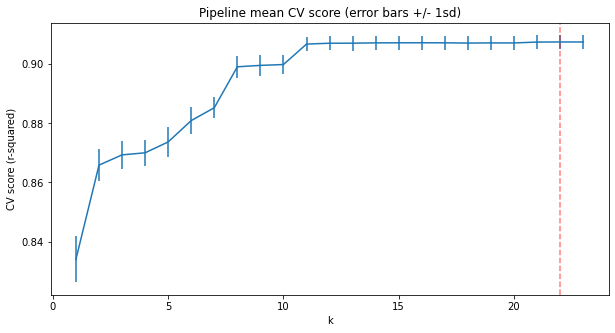

In [98]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

The above suggests a good value for k is 22. As we increasingly overfit, expect greater swings in performance as different points move in and out of the train/test folds.

In [99]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [100]:
#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

N_Soil_Temperature_10cm                                                                  2.571654
N_Shortwave_Radiation                                                                    1.239978
Methane emissions (kt of CO2 equivalent)_new                                             0.523224
Urban population_new                                                                     0.338059
CO2 emissions from liquid fuel consumption (kt)_new                                      0.282260
N_Precipitation_Total                                                                    0.097882
Fuel exports (% of merchandise exports)_new                                              0.094561
N_Relative_Humidity_m                                                                    0.092248
Agricultural land (sq. km)_new                                                           0.026030
N_Wind_Direction_Dominant_10m                                                            0.024455
Population growth (a

These results suggest that Soil Temperature, Shortwave Radiation, Methane Emissions, Urban Population growth, CO2 emissions are the biggest positive features. 
This makes intuitive sense and is consistent with what we saw during the EDA work.

### Random Forest Model

A model that can work very well in a lot of cases is the random forest. For regression, this is provided by sklearn's RandomForestRegressor class.

Time to stop the bad practice of repeatedly checking performance on the test split. Instead, let's go straight from defining the pipeline to assessing performance using cross-validation. cross_validate will perform the fitting as part of the process. This uses the default settings for the random forest so you'll then proceed to investigate some different hyperparameters.

In [101]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [102]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [103]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.92670934, 0.92662959, 0.9220537 , 0.93148061, 0.92718681])

In [104]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9268120086296578, 0.002987358753579629)

### Hyperparameter search using GridSearchCV

Random forest has a number of hyperparameters that can be explored, however here we'll limit ourselves to exploring some different values for the number of trees. 
We'll try it with and without feature scaling, and try both the mean and median as strategies for imputing missing values.m

In [105]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [106]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=2, n_jobs=-1)

In [107]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [108]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

It looks like imputing with the median helps, but scaling the features doesn't.

In [109]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.9281821 , 0.9277262 , 0.92218478, 0.93217211, 0.92823218])

In [110]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9276994735042317, 0.003191667812968548)

We've marginally improved upon the default CV results. Random forest has many more hyperparameters we could tune, but we won't dive into that here.

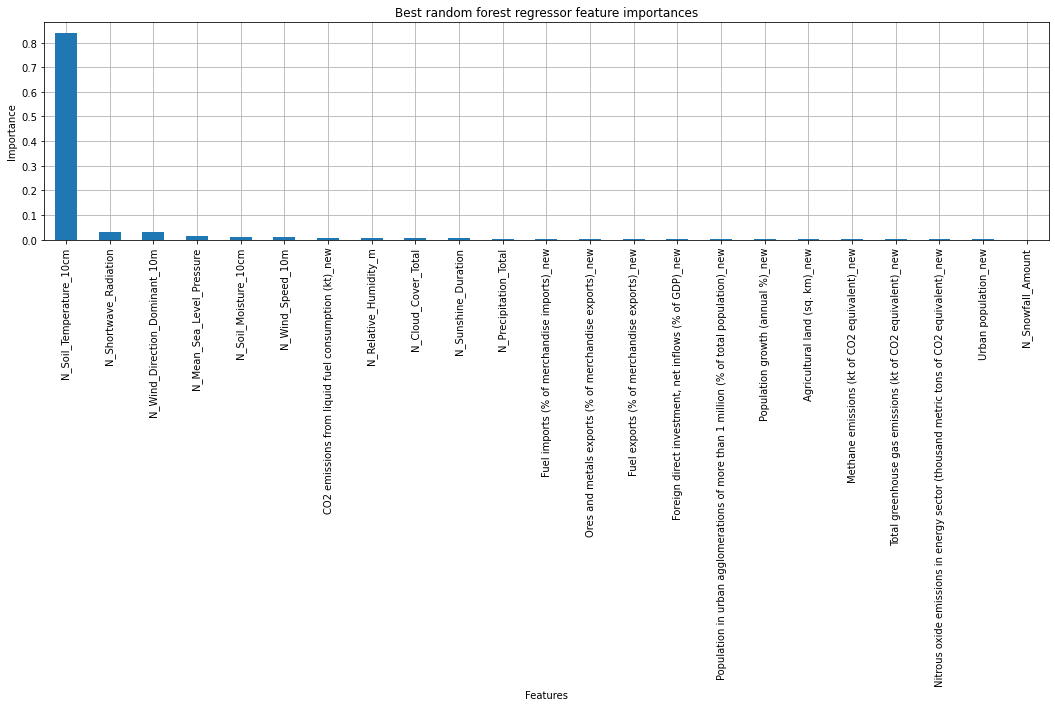

In [111]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(18, 4))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
plt.grid(True)
ax = rf_feat_imps.plot(kind='bar', grid=True)
ax.set_axisbelow(True) 
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best random forest regressor feature importances');

These results suggest that Soil Temperature is the biggest positive features (in terms of consequences).
Similarly, the first positive features in terms of possible causes are: CO2 emissions, but this is very small, so conclusion cannot be drawn for the temperature alone.
This makes intuitive sense and is consistent with what we saw during the EDA work.
Let' shave a look at the precipitation instead to see if we can isolate some more prominent causes.

### Predicting Precipitations

In [114]:
# Let's define our features:
features = ['CO2 emissions from liquid fuel consumption (kt)_new',
       'Fuel exports (% of merchandise exports)_new',
       'Fuel imports (% of merchandise imports)_new',
       'Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new',
       'Ores and metals exports (% of merchandise exports)_new',
       'Agricultural land (sq. km)_new',
       'Foreign direct investment, net inflows (% of GDP)_new',
       'Methane emissions (kt of CO2 equivalent)_new',
       'Population growth (annual %)_new',
       'Population in urban agglomerations of more than 1 million (% of total population)_new',
       'Total greenhouse gas emissions (kt of CO2 equivalent)_new',
       'Urban population_new', 'N_Temperature_m',
       'N_Snowfall_Amount', 'N_Relative_Humidity_m', 'N_Wind_Speed_10m',
       'N_Cloud_Cover_Total', 'N_Sunshine_Duration', 'N_Shortwave_Radiation',
       'N_Mean_Sea_Level_Pressure', 'N_Soil_Temperature_10cm',
       'N_Soil_Moisture_10cm', 'N_Wind_Direction_Dominant_10m']


X = df_original[features]
y = df_original['N_Precipitation_Total'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [115]:
train_mean = y_train.mean()
train_mean

#Fit the dummy regressor on the training data
#Let's call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

y_tr_pred_ = train_mean * np.ones(len(y_train))
y_tr_pred_[:5]

#Remember the sklearn dummy regressor?
y_tr_pred = dumb_reg.predict(X_train)
y_tr_pred[:5]

0.03909144139304221

DummyRegressor()

array([[0.03909144]])

array([0.03909144, 0.03909144, 0.03909144, 0.03909144, 0.03909144])

array([0.03909144, 0.03909144, 0.03909144, 0.03909144, 0.03909144])

In [116]:
r_squared(y_train, y_tr_pred)

y_te_pred = train_mean * np.ones(len(y_test))
r_squared(y_test, y_te_pred)


mae(y_train, y_tr_pred)

mse(y_train, y_tr_pred)

mse(y_test, y_te_pred)

np.sqrt([mse(y_train, y_tr_pred), mse(y_test, y_te_pred)])

# These are the values we'll use to fill in any missing values
X_defaults_median = X_train.median()
X_defaults_median

# Apply the imputation to both train and test splits
#Call `X_train` and `X_test`'s `fillna()` method, passing `X_defaults_median` as the values to use
#Assign the results to `X_tr` and `X_te`, respectively
X_tr = X_train.fillna(X_defaults_median)
X_te = X_test.fillna(X_defaults_median)

0.0

-0.0038539724561390543

0.055517648166818735

0.014173746712984983

0.023840509800187017

array([0.11905355, 0.15440372])

CO2 emissions from liquid fuel consumption (kt)_new                                      8.072755e+03
Fuel exports (% of merchandise exports)_new                                              7.487857e+00
Fuel imports (% of merchandise imports)_new                                              1.980256e+01
Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new    7.921492e+02
Ores and metals exports (% of merchandise exports)_new                                   2.966648e+00
Agricultural land (sq. km)_new                                                           2.705325e+05
Foreign direct investment, net inflows (% of GDP)_new                                    8.336035e-01
Methane emissions (kt of CO2 equivalent)_new                                             2.240299e+04
Population growth (annual %)_new                                                         2.863826e+00
Population in urban agglomerations of more than 1 million (% of total population)_

In [117]:
# Scale the data
#Call the StandardScaler`s fit method on `X_tr` to fit the scaler
#then use it's `transform()` method to apply the scaling to both the train and test split
#data (`X_tr` and `X_te`), naming the results `X_tr_scaled` and `X_te_scaled`, respectively
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)

# Train the model on the train split
lm = LinearRegression().fit(X_tr_scaled, y_train)

# Make predictions using the model on both train and test splits
#Call the `predict()` method of the model (`lm`) on both the (scaled) train and test data
#Assign the predictions to `y_tr_pred` and `y_te_pred`, respectively
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)


StandardScaler()

In [118]:
# r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

#Now calculate the mean absolute error scores using `sklearn`'s `mean_absolute_error` function
# as we did above for R^2
# MAE - train, test
median_mae = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
median_mae

## Using this model, then, on average you'd expect to estimateof the temperature within 2.8 Deg F or so of the real Temperature. 
## This is better than the 3 Deg F from just guessing using the average. There may be something to this machine learning lark after all!

#And also do the same using `sklearn`'s `mean_squared_error`
# MSE - train, test
median_mse = mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)
median_mse

(0.27623134484781287, 0.2643869853156644)

(0.05041165453167963, 0.055812969281834136)

(0.010258513596925142, 0.01747006015508245)

In [119]:
#As we did for the median above, calculate mean values for imputing missing values
# These are the values we'll use to fill in any missing values
X_defaults_mean = X_train.mean()
X_defaults_mean

# Apply the imputation to both train and test splits
X_tr = X_train.fillna(X_defaults_mean)
X_te = X_test.fillna(X_defaults_mean)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_te_scaled = scaler.transform(X_te)


CO2 emissions from liquid fuel consumption (kt)_new                                      8.005256e+03
Fuel exports (% of merchandise exports)_new                                              7.981261e+00
Fuel imports (% of merchandise imports)_new                                              1.977099e+01
Nitrous oxide emissions in energy sector (thousand metric tons of CO2 equivalent)_new    8.745321e+02
Ores and metals exports (% of merchandise exports)_new                                   3.023254e+00
Agricultural land (sq. km)_new                                                           2.707447e+05
Foreign direct investment, net inflows (% of GDP)_new                                    8.446157e-01
Methane emissions (kt of CO2 equivalent)_new                                             2.720115e+04
Population growth (annual %)_new                                                         2.862195e+00
Population in urban agglomerations of more than 1 million (% of total population)_

StandardScaler()

In [120]:
# Train the model on the train split
lm = LinearRegression().fit(X_tr_scaled, y_train)

#Make predictions using the model on both train and test splits
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

#Assess model performance
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(0.27623134484781287, 0.2643869853156644)

(0.05041165453167963, 0.055812969281834136)

(0.010258513596925142, 0.01747006015508245)

In [121]:
# Define the pipeline
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LinearRegression()
)

type(pipe)

hasattr(pipe, 'fit'), hasattr(pipe, 'predict')

#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
pipe.fit(X_train, y_train)

# Make predictions on the train and test sets
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)


sklearn.pipeline.Pipeline

(True, True)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [122]:
# Assess performance
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

median_r2

mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

#Compare with earlier results:
median_mae;
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred);
median_mse


(0.27623134484781287, 0.2643869853156644)

(0.27623134484781287, 0.2643869853156644)

(0.05041165453167963, 0.055812969281834136)

(0.05041165453167963, 0.055812969281834136)

(0.010258513596925142, 0.01747006015508245)

(0.010258513596925142, 0.01747006015508245)

In [123]:
#Define the pipeline
#Add `SelectKBest` as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
#Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

pipe.fit(X_train, y_train)

y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

#Modify the `SelectKBest` step to use a value of 15 for k
pipe15 = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression, k=15),
    LinearRegression()
)

C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x00000242264A30D0>)),
                ('linearregression', LinearRegression())])

(0.26971454839367326, 0.2600815239565103)

In [124]:
pipe15.fit(X_train, y_train)

y_tr_pred = pipe15.predict(X_train)
y_te_pred = pipe15.predict(X_test)

r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

cv_results = cross_validate(pipe15, X_train, y_train, cv=5)

cv_scores = cv_results['test_score']
cv_scores

np.mean(cv_scores), np.std(cv_scores)

np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)


C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=15,
                             score_func=<function f_regression at 0x00000242264A30D0>)),
                ('linearregression', LinearRegression())])

(0.272362012374051, 0.2623542400420823)

(0.0504447126275892, 0.05566378629959597)

C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


array([0.29304121, 0.28559198, 0.26555054, 0.22801395, 0.27984219])

(0.27040797514896664, 0.023033322011648934)

array([0.22, 0.32])

In [126]:
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'selectkbest', 'linearregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

In [127]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

lr_grid_cv.fit(X_train, y_train)

score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

C:\Users\mohamed.ziane\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x00000242264A30D0>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23]})

In [128]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 21}

(<Figure size 720x360 with 1 Axes>, <AxesSubplot:>)

<ErrorbarContainer object of 3 artists>

Text(0.5, 0, 'k')

Text(0, 0.5, 'CV score (r-squared)')

Text(0.5, 1.0, 'Pipeline mean CV score (error bars +/- 1sd)')

N_Soil_Moisture_10cm                                                                     0.037741
N_Temperature_m                                                                          0.022745
Total greenhouse gas emissions (kt of CO2 equivalent)_new                                0.021822
CO2 emissions from liquid fuel consumption (kt)_new                                      0.007983
N_Relative_Humidity_m                                                                    0.007095
Urban population_new                                                                     0.003447
Fuel exports (% of merchandise exports)_new                                              0.002963
N_Wind_Direction_Dominant_10m                                                            0.001646
Ores and metals exports (% of merchandise exports)_new                                   0.001627
Population in urban agglomerations of more than 1 million (% of total population)_new    0.000610
N_Wind_Speed_10m    

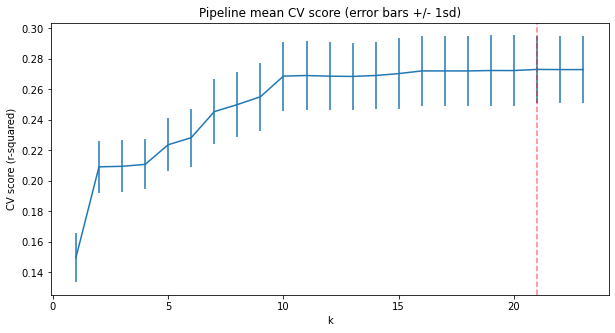

In [129]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

#Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
#get the matching feature names from the column names of the dataframe,
#and display the results as a pandas Series with `coefs` as the values and `features` as the index,
#sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

### Random Forest Model

In [130]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.7262814 , 0.71137884, 0.60539171, 0.73832524, 0.71805526])

In [131]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)


(0.6998864905393866, 0.048095051368703505)

### Hyperparameter search using GridSearchCV

In [132]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [133]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=2, n_jobs=-1)


In [134]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

{'randomforestregressor__n_estimators': 26,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [135]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

np.mean(rf_best_scores), np.std(rf_best_scores)

array([0.71260892, 0.70351892, 0.5982234 , 0.73566595, 0.71114762])

(0.6922329612180743, 0.048217299649183525)

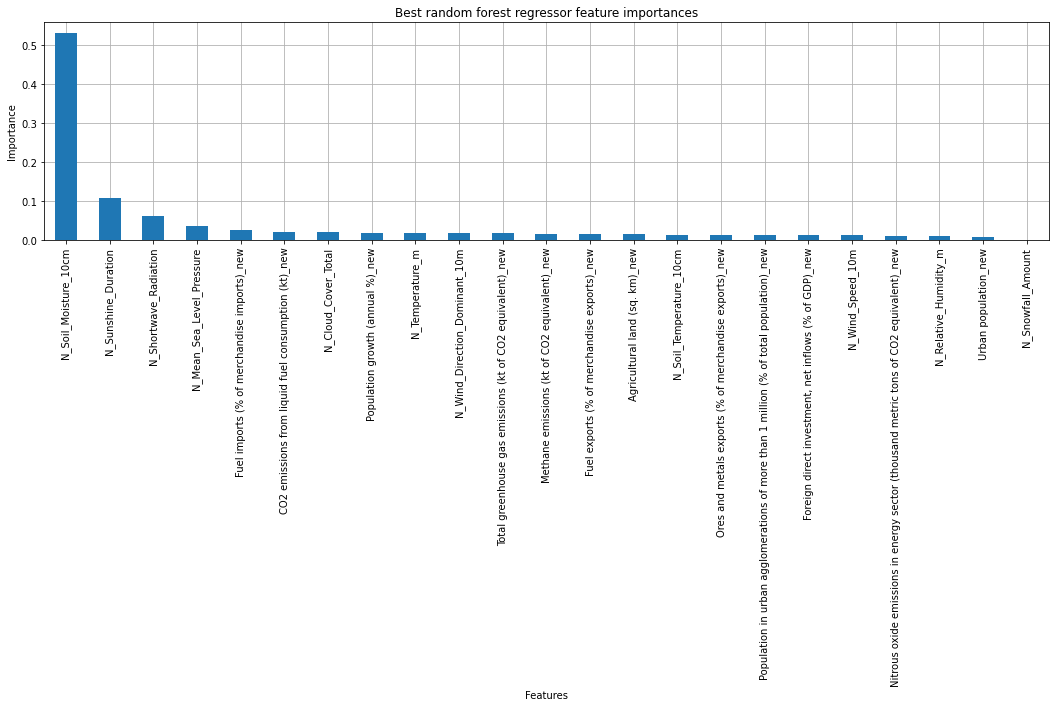

In [136]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(18, 4))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
plt.grid(True)
ax = rf_feat_imps.plot(kind='bar', grid=True)
ax.set_axisbelow(True) 
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Best random forest regressor feature importances');

These results suggest that Soil Moisture, Sunshine Duration, Shortwave Radiation, Mean Sea Level Pressure are among the biggest positive features (in terms of consequences).
Similarly, the biggest positive feature sin terms of possible causes are: Fuel Imports & CO2 emissions!
This makes intuitive sense and is consistent with what we saw during the EDA work.